In [1]:
import pandas as pd


# Data Cleansing

In [2]:
books = pd.read_csv('books.csv')

In [3]:
books.shape

(1500, 22)

In [4]:
books = books.drop(columns=['country', 'domain', 'gallery', 'image', 'model', 'url', 'weight', 'uniq_id', 'type'])

In [5]:
books_desc = books['desc']
books_desc[0]

'{"Description"=>{"Product Code"=>"9780553590487_20567", "ISBN-13"=>"9780553590487", "ISBN-10"=>"553590480", "Authored By"=>"Kay Hooper", "Publication Year"=>"2007", "Imprint"=>"Bantam", "Binding"=>"Others", "Languages"=>"English", "ISBN 13"=>"9780553590487"}, "Shipping Details"=>{"Estimated Arrival"=>"8 - 11 days", "Return Policy"=>"Seller will accept returns within a 15 days from date of delivery of the item"}}'

In [6]:
book_parse_desc = []
from ast import literal_eval
for a in books_desc:
    r = a.replace('=>', ':')
    r = r.replace('{"Description":', '')
    r = r.replace('{', '')
    r = r.replace('}', '')
    r = r.replace("'", "")
    r = r.replace("Shipping Details", '')
    r = r.replace("Terms & Condition", '')
    r = r.replace("Product Details", '')
    r = r.replace("Warranty Details", '')
    r = r.replace("Description", '')    
    r = r.replace('""' + ':', '')
    r = r.replace(' , ', '')
    r = "{" + r + "}"
    r = literal_eval(r)
    book_parse_desc.append(r)    

In [7]:
#books_desc
books1 = pd.DataFrame(x for x in book_parse_desc)


In [8]:
books1.columns

Index(['About the Author', 'Age', 'Age wise', 'Author', 'Author Info',
       'Authored By', 'Binding', 'Brand', 'Dimensions (L X B X H)',
       'Edited By', 'Edition', 'Estimated Arrival', 'ISBN 13', 'ISBN-10',
       'ISBN-13', 'ISBN10', 'ISBN13', 'Imprint', 'Imprints', 'Language',
       'Languages', 'No. Of Pages', 'Number Of Pages', 'Product Code',
       'Product Weight', 'Publication Year', 'Publisher', 'Publisher Name',
       'Publisher name', 'Return Policy', 'Series Name', 'Shipping Charge',
       'Specialization', 'Type', 'University', 'Warranty Summary', 'Weight',
       'Weight(Gm)', 'Weight(gm)'],
      dtype='object')

In [9]:
books1 = books1[['Author', 'Authored By', 'Binding', 'Publisher', 'Publication Year', 'Publisher Name']]



In [10]:
books1['Author'] = books1['Author'].map(str).replace('nan', '') + ' ' + books1['Authored By']
books1['Publisher'] = books1['Publisher'].map(str).replace('nan', '') + ' ' + books1['Publisher Name']

books1 = books1.drop(columns=['Authored By', 'Publisher Name'])

In [11]:
books1.head()

,Author,Binding,Publisher,Publication Year
0,Kay Hooper,Others,NaN,2007
1,Devaki Nandan Khatri,Paperback,Rupa Publications,2015
2,Tami Hoag,Paperback,Random House,2008
3,Danielle Steel,Paperback,Transworld Publishers,2015
4,NaN,Paperback,Books,2015


In [12]:
new_books = pd.concat([books, books1], axis=1)

In [13]:
other_sellers = books['other_sellers']
other_seller1 = []
other_seller2 = []
other_seller3 = []
other_seller4 = []
other_seller5 = []
other_seller6 = []
other_sellers = other_sellers.fillna('[{"name":"none"}]')
ex2 = []

In [14]:
for index, val in enumerate(other_sellers):
    if ("},{" not in other_sellers[index]): 
        other_seller1.append(val)
        other_seller2.append('[{"name": "none"}]')
        other_seller3.append('[{"name": "none"}]')
        other_seller4.append('[{"name":"none"}]')
        other_seller5.append('[{"name":"none"}]')
    
    elif ("},{" in other_sellers[index]): 
        try: 
            OS1, OS2 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append('[{"name":"none"}]')
            other_seller4.append('[{"name":"none"}]')
            other_seller5.append('[{"name":"none"}]')
                        
        except:
            pass
        
        try: 
            OS1, OS2, OS3 = other_sellers[index].split("},{")
            other_seller1.append(OS1+ "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append('[{"name":"none"}]')
            other_seller5.append('[{"name":"none"}]')
                       
        except:
            pass
    
        try: 
            OS1, OS2, OS3, OS4 = other_sellers[index].split("},{")
            other_seller1.append(OS1+ "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append('[{"name":"none"}]')
                        
        except:
            pass
       
        try: 
            OS1, OS2, OS3, OS4, OS5 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")

        except:
            pass
       
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass

        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9, OS10 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9, OS10, OS11 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9, OS10, OS11, OS12 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9, OS10, OS11, OS12, OS13 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2+ "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16, OS17 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16, OS17, OS18 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16, OS17, OS18, OS19 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16, OS17, OS18, OS19, OS20 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16, OS17, OS18, OS19, OS20, OS21 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16, OS17, OS18, OS19, OS20, OS21, OS22 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass

        

In [15]:
import json
other_seller1new = []
other_seller2new = []
other_seller3new = []
other_seller4new = []
other_seller5new = []

for i in other_seller1:
    r = i.replace('[', '')
    r = r.replace(']', '')
#     ex2.append(r)
    other_seller1new.append(json.loads(r))

for l in other_seller2:
    r = l.replace('[', '')
    r = r.replace(']', '')  
    r = r.replace('}}', '}')
    r = r.replace('{{', '{')
    other_seller2new.append(json.loads(r))
    
for l in other_seller3:
    r = l.replace('[', '')
    r = r.replace(']', '')  
    r = r.replace('}}', '}')
    r = r.replace('{{', '{')
    other_seller3new.append(json.loads(r))
    
for l in other_seller4:
    r = l.replace('[', '')
    r = r.replace(']', '')  
    r = r.replace('}}', '}')
    r = r.replace('{{', '{')
    other_seller4new.append(json.loads(r))
    
for l in other_seller5:
    r = l.replace('[', '')
    r = r.replace(']', '')  
    r = r.replace('}}', '}')
    r = r.replace('{{', '{')
    other_seller5new.append(json.loads(r))
    

In [16]:
other_seller1new

[{'name': 'A1',
  'id': 44120,
  'offer_text': None,
  'offer_price': 359,
  'totalScore': -359,
  'product_id': 10050188,
  'url': 'https://catalog.paytm.com/v1/p/c-j-s-fate-9780553590487_44120',
  'seourl': 'https://catalog.paytm.com/v1/p/c-j-s-fate-9780553590487_44120',
  'exist': True,
  'applied': False},
 {'name': 'comma365 ',
  'id': 21057,
  'offer_text': None,
  'offer_price': 316,
  'totalScore': -316,
  'product_id': 34179194,
  'url': 'https://catalog.paytm.com/v1/p/chandrakanta-9788129131126_21057',
  'seourl': 'https://catalog.paytm.com/v1/p/chandrakanta-9788129131126_21057',
  'exist': True,
  'applied': False},
 {'name': 'none'},
 {'name': 'comma365 ',
  'id': 21057,
  'offer_text': None,
  'offer_price': 319,
  'totalScore': -319,
  'product_id': 30214839,
  'url': 'https://catalog.paytm.com/v1/p/perfect-life-9780552165891_21057',
  'seourl': 'https://catalog.paytm.com/v1/p/perfect-life-9780552165891_21057',
  'exist': True,
  'applied': False},
 {'name': 'NSGlobal',
 

In [17]:
ex2[0:4]

[]

In [18]:
OS1 = pd.DataFrame(x for x in other_seller1new)
OS1 = OS1[['name','offer_price']]
OS1 = OS1.rename(index=str, columns={"name":"seller1_name", "offer_price": "seller1_selling_price"})

OS2 = pd.DataFrame(x for x in other_seller2new)
OS2 = OS2[['name','offer_price']]
OS2 = OS2.rename(index=str, columns={"name":"seller2_name", "offer_price": "seller2_selling_price"})

OS3 = pd.DataFrame(x for x in other_seller3new)
OS3 = OS3[['name','offer_price']]
OS3 = OS3.rename(index=str, columns={"name":"seller3_name", "offer_price": "seller3_selling_price"})

OS4 = pd.DataFrame(x for x in other_seller4new)
OS4 = OS4[['name','offer_price']]
OS4 = OS4.rename(index=str, columns={"name":"seller4_name", "offer_price": "seller4_selling_price"})

OS5 = pd.DataFrame(x for x in other_seller5new)
OS5 = OS5[['name','offer_price']]
OS5 = OS5.rename(index=str, columns={"name":"seller5_name", "offer_price": "seller5_selling_price"})

In [19]:
OS1.head()

,seller1_name,seller1_selling_price
0,A1,359.0
1,comma365,316.0
2,none,NaN
3,comma365,319.0
4,NSGlobal,1949.0


In [20]:
OS1.index = OS1.index.astype(int)
OS2.index = OS2.index.astype(int)
OS3.index = OS3.index.astype(int)
OS4.index = OS4.index.astype(int)
OS5.index = OS5.index.astype(int)

new_books = pd.merge(books, books1, left_index=True, right_index=True)
new_books = pd.merge(new_books, OS1, left_index=True, right_index=True)
new_books = pd.merge(new_books, OS2, left_index=True, right_index=True)
new_books = pd.merge(new_books, OS3, left_index=True, right_index=True)
new_books = pd.merge(new_books, OS4, left_index=True, right_index=True)
new_books = pd.merge(new_books, OS5, left_index=True, right_index=True)


In [21]:
new_books = new_books.drop(columns=['desc', 'insertedon', 'other_sellers', 'specifications'])


In [22]:
publisher_new_books = new_books['brand'].fillna(new_books['Publisher'])
publisher_new_books
new_books = new_books.merge(publisher_new_books.to_frame(), left_index=True, right_index=True)
new_books

,amtsave,brand_x,breadcrumbs,discount,list_price,name,payment_methods_supported,productcode,selling_price,Author,...,seller1_selling_price,seller2_name,seller2_selling_price,seller3_name,seller3_selling_price,seller4_name,seller4_selling_price,seller5_name,seller5_selling_price,brand_y
0,72,NaN,Books | Literature & Fiction | Romance | C.J.'...,20%%,358,C.J.'s Fate,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",2431977,286,Kay Hooper,...,359.0,none,NaN,none,NaN,none,NaN,none,NaN,NaN
1,117,Rupa Publications India,Books | Literature & Fiction | Short Stories |...,30%%,395,Chandrakanta,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",22655539,278,Devaki Nandan Khatri,...,316.0,Starmark,356.0,Aarohi Online Book Shop,495.0,none,NaN,none,NaN,Rupa Publications India
2,57,Random House,Books | Literature & Fiction | Romance | Heart...,14%%,416,Heart Of Dixie,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",13587974,359,Tami Hoag,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Random House
3,84,Transworld Publishers,Books | Literature & Fiction | General | Perfe...,21%%,399,Perfect Life,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",29545536,315,Danielle Steel,...,319.0,Sagar Enterprises,319.0,BOOKSMANDI,339.0,Dux Marketing Services,369.0,Booknest,399.0,Transworld Publishers
4,1050,Books,Books | Literature & Fiction | Literature | Pa...,35%%,2999,Paulo Coelho The Golden Collection,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",23104384,1949,NaN,...,1949.0,GS RETAIL,1949.0,Onebuy.in,2249.0,BSSdelhi,2308.0,Book Place,2339.0,Books
5,63,Random House Publishing Group,Books | Literature & Fiction | Suspense Thrill...,14%%,462,The Devil's Banker,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",12136614,399,Christopher Reich,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Random House Publishing Group
6,75,Dell,Books | Literature & Fiction | Suspense Thrill...,14%%,554,The Brethren,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",10046244,479,John Grisham,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Dell
7,53,Random House,Books | Literature & Fiction | General | The I...,11%%,485,The Innocent,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",32878233,432,"Stevens, Taylor",...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Random House
8,63,Random House Publishing Group,Books | Literature & Fiction | Romance | True ...,14%%,462,True Love,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",13669961,399,Jude Deveraux,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Random House Publishing Group
9,90,Harper Collins Publishers India,Books | Literature & Fiction | General | Warri...,36%%,250,Warriors: Power of Three #3: Outcast,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",44858122,160,Erin Hunter,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Harper Collins Publishers India


In [23]:
new_books = new_books.drop(columns=['brand_x', 'Publisher'])
new_books

,amtsave,breadcrumbs,discount,list_price,name,payment_methods_supported,productcode,selling_price,Author,Binding,...,seller1_selling_price,seller2_name,seller2_selling_price,seller3_name,seller3_selling_price,seller4_name,seller4_selling_price,seller5_name,seller5_selling_price,brand_y
0,72,Books | Literature & Fiction | Romance | C.J.'...,20%%,358,C.J.'s Fate,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",2431977,286,Kay Hooper,Others,...,359.0,none,NaN,none,NaN,none,NaN,none,NaN,NaN
1,117,Books | Literature & Fiction | Short Stories |...,30%%,395,Chandrakanta,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",22655539,278,Devaki Nandan Khatri,Paperback,...,316.0,Starmark,356.0,Aarohi Online Book Shop,495.0,none,NaN,none,NaN,Rupa Publications India
2,57,Books | Literature & Fiction | Romance | Heart...,14%%,416,Heart Of Dixie,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",13587974,359,Tami Hoag,Paperback,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Random House
3,84,Books | Literature & Fiction | General | Perfe...,21%%,399,Perfect Life,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",29545536,315,Danielle Steel,Paperback,...,319.0,Sagar Enterprises,319.0,BOOKSMANDI,339.0,Dux Marketing Services,369.0,Booknest,399.0,Transworld Publishers
4,1050,Books | Literature & Fiction | Literature | Pa...,35%%,2999,Paulo Coelho The Golden Collection,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",23104384,1949,NaN,Paperback,...,1949.0,GS RETAIL,1949.0,Onebuy.in,2249.0,BSSdelhi,2308.0,Book Place,2339.0,Books
5,63,Books | Literature & Fiction | Suspense Thrill...,14%%,462,The Devil's Banker,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",12136614,399,Christopher Reich,Others,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Random House Publishing Group
6,75,Books | Literature & Fiction | Suspense Thrill...,14%%,554,The Brethren,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",10046244,479,John Grisham,Paperback,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Dell
7,53,Books | Literature & Fiction | General | The I...,11%%,485,The Innocent,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",32878233,432,"Stevens, Taylor",Paperback,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Random House
8,63,Books | Literature & Fiction | Romance | True ...,14%%,462,True Love,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",13669961,399,Jude Deveraux,Others,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Random House Publishing Group
9,90,Books | Literature & Fiction | General | Warri...,36%%,250,Warriors: Power of Three #3: Outcast,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",44858122,160,Erin Hunter,Paperback,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Harper Collins Publishers India


# What are the Top Selling Books and Their Prices

In [24]:
new_books.name.value_counts()[0:6].sort_index().plot.pie(figsize=(15,5))

In [25]:
new_books.name.value_counts()[0:6]

Selected Stories                            8
Alice In The Country Of Clover: Cheshire    4
Love Story                                  3
The Bridges of Constantine                  3
Alice In The Country Of Joker: Circus An    3
No Hero                                     3
Name: name, dtype: int64

In [26]:
selected_stories = new_books[new_books.name == "Selected Stories"].selling_price.mean()
alice_clover  = new_books[new_books.name == "Alice In The Country Of Clover: Cheshire"].selling_price.mean()
love_story = new_books[new_books.name == "Love Story"].selling_price.mean()
alice_joker = new_books[new_books.name == "Alice In The Country Of Joker: Circus An"].selling_price.mean()
no_hero = new_books[new_books.name == "No Hero"].selling_price.mean()
bridges = new_books[new_books.name == "The Bridges of Constantine"].selling_price.mean()


In [27]:
print(selected_stories)
print(alice_clover)
print(love_story)
print(alice_joker)
print(no_hero)
print(bridges)


98.0
639.0
145.66666666666666
599.0
424.3333333333333
323.0


# What Prices Attract Customers

In [39]:
authors = pd.DataFrame(data = new_books.Author.value_counts()).index

In [42]:
prices = []
def calculate_author_avg(names):
    for i in names:
        price = new_books[new_books.Author == i].selling_price.mean()
        prices.append(price)

calculate_author_avg(authors)



In [46]:
authors_df = pd.DataFrame(data = new_books.Author.value_counts())

In [48]:
authors_df['avg_prices'] = prices

In [56]:
authors_df.describe()

,Author,avg_prices
count,689.000000,689.000000
mean,1.493469,604.211389
std,1.923017,795.322319
min,1.000000,64.000000
25%,1.000000,259.000000
50%,1.000000,399.000000
75%,1.000000,718.000000
max,27.000000,12801.000000


In [109]:
price_bins = []

for price in authors_df['avg_prices']:
    if(price <= 200):
        price_bins.append(1)
    if(price > 200 and price <= 400):
        price_bins.append(2)
    if(price > 400 and price <= 600):
        price_bins.append(3)
    if(price > 600 and price <= 800):
        price_bins.append(4)
    if(price > 800):
        price_bins.append(5)

authors_df['bins'] = price_bins

In [110]:
price_counts = []
    
price_counts.append(authors_df[authors_df['bins'] == 1].Author.sum())
price_counts.append(authors_df[authors_df['bins'] == 2].Author.sum())
price_counts.append(authors_df[authors_df['bins'] == 3].Author.sum())
price_counts.append(authors_df[authors_df['bins'] == 4].Author.sum())
price_counts.append(authors_df[authors_df['bins'] == 5].Author.sum())


In [111]:
price_counts

[129, 501, 105, 155, 139]

In [117]:
bins = list(set(price_bins))

Text(0, 0.5, 'Sum')

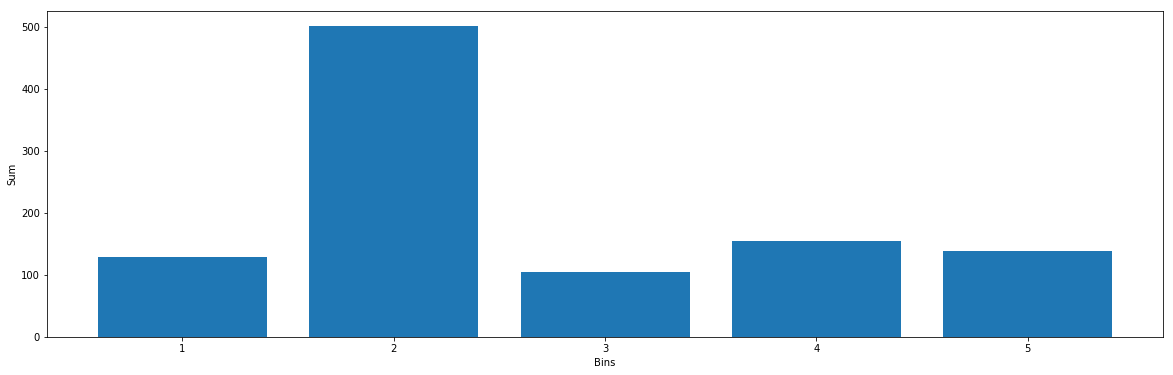

In [123]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20, 6))

plt.bar(bins, price_counts)
plt.xlabel ('Bins')
plt.ylabel ('Sum')


# What percentage of Books Is Being Sold

In [137]:
a = new_books.name.value_counts()


In [139]:
a = pd.DataFrame(data = a)

In [148]:
c = []
for bc in a.index:
    ac = new_books[new_books['name'] == bc ].selling_price.mean()
    c.append(ac)
    
a['prices'] = c

In [150]:
a.head()

,name,prices
Selected Stories,8,98.000000
Alice In The Country Of Clover: Cheshire,4,639.000000
Love Story,3,145.666667
The Bridges of Constantine,3,323.000000
Alice In The Country Of Joker: Circus An,3,599.000000


In [151]:
price_bins = []

for price in a['prices']:
    if(price <= 200):
        price_bins.append(1)
    if(price > 200 and price <= 400):
        price_bins.append(2)
    if(price > 400 and price <= 600):
        price_bins.append(3)
    if(price > 600 and price <= 800):
        price_bins.append(4)
    if(price > 800):
        price_bins.append(5)

a['bins'] = price_bins

In [152]:
a.head()

,name,prices,bins
Selected Stories,8,98.000000,1
Alice In The Country Of Clover: Cheshire,4,639.000000,4
Love Story,3,145.666667,1
The Bridges of Constantine,3,323.000000,2
Alice In The Country Of Joker: Circus An,3,599.000000,3


In [155]:
a[a['bins'] == 1].bins.count()

185

In [156]:
a[a['bins'] == 2].bins.count()

727

In [157]:
a[a['bins'] == 3].bins.count()

164

In [158]:
a[a['bins'] == 4].bins.count()

182

In [159]:
a[a['bins'] == 5].bins.count()

197

# How Do Prices between Sellers Compare